In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [2]:
#load dataset using pandas
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#create train image from df train
train_images = df_train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

In [5]:
#create test image from df_test
test_images = df_test.iloc[:, :].values.reshape(-1, 28, 28, 1)

In [6]:
#setting y to label
y = df_train['label']

<Figure size 720x720 with 0 Axes>

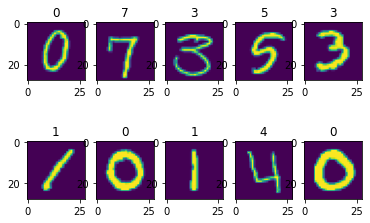

In [7]:
#visualise few images
plt.figure(figsize=(10,10))
f, ax = plt.subplots(2, 5)

for i in range(5):
    ax[0,i].imshow(train_images[i+5])
    ax[0,i].set_title(y[i+5])
    ax[1,i].imshow(train_images[i])
    ax[1,i].set_title(y[i])
    

In [8]:
#split the data to train and validation
X_train, X_val, y_train, y_val = train_test_split(train_images, y, test_size=0.2, random_state=42, shuffle=False)

In [9]:
#reshape images and convert to float
X_train = X_train.reshape(-1, 784)/255.
X_val = X_val.reshape(-1, 784)/255.
X_test = test_images.reshape(-1, 784)/255.

In [10]:
class MLP_Model(models.Model):
    def __init__(self, units, activations, out_units, out_activation):
        """
        A Multi-layer perceptron model, subclassing models.Model.

        args:
            units, list of integers giving number of units in first three layers
            activations, list of strings giving the activations of the first
                         three layers
            out_units, number of units in the output layer
            out_activation, activation function of the output layer
        """
        super(MLP_Model, self).__init__()
        self.units = units
        self.activations = activations
        self.out_units = out_units
        self.out_activation = out_activation

        #setting up layers
        self.inputs = layers.Input(shape=(784,), dtype='float32')

        self.Dense1 = layers.Dense(units=self.units[0], activation=self.activations[0],
                                   name='MLP_Dense_1')
        self.Dense2 = layers.Dense(units=self.units[1], activation=self.activations[1],
                                   name='MLP_Dense_2')
        self.Dense3 = layers.Dense(units=self.units[2], activation=self.activations[2],
                                   name='MLP_Dense_3')

        self.Output = layers.Dense(self.out_units, activation=self.out_activation)

  


  
    def call(self, inputs):
        #call method 

        
        x = self.Dense1(inputs)
        x = self.Dense2(x)
        x = self.Dense3(x)
        
        x = self.Output(x)
          


        return x

In [11]:
units = [512, 256, 128]
activations = ['relu', 'relu', 'relu']
out_units = 10
out_activation = 'softmax'

#intialize a model instance of the created class
model = MLP_Model(units, activations, out_units, out_activation)

In [12]:
# compile model with adam optimizer
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [13]:
#fit model and train
EPOCHS=20
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2453 - Accuracy: 0.9261 - val_loss: 0.1459 - val_Accuracy: 0.9542
Epoch 2/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1022 - Accuracy: 0.9679 - val_loss: 0.1030 - val_Accuracy: 0.9689
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0722 - Accuracy: 0.9766 - val_loss: 0.1038 - val_Accuracy: 0.9692
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0549 - Accuracy: 0.9819 - val_loss: 0.1081 - val_Accuracy: 0.9714
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0420 - Accuracy: 0.9865 - val_loss: 0.1003 - val_Accuracy: 0.9737
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0405 - Accuracy: 0.9869 - val_loss: 0.0821 - val_Accuracy: 0.9781
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0285 - Accuracy: 0.9911 - val_loss: 0.1787 - val_Accuracy:

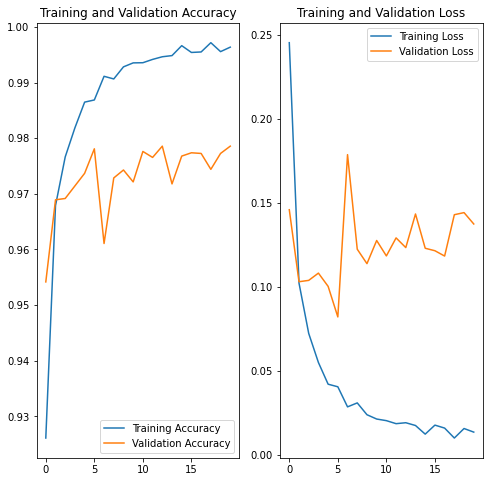

In [14]:
### Plot the losses and metrics for the training and test data
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
#predict the test label using model
y_pred = model.predict(X_test)

875/875 [==============================] - 3s 3ms/step


In [16]:
#convert prediction to an array
y_pred = np.argmax(y_pred, 1)

<Figure size 720x720 with 0 Axes>

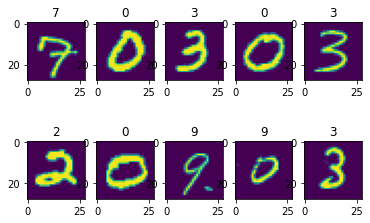

In [17]:
#visualize few images of test data and predicted labels
plt.figure(figsize=(10,10))
f, ax = plt.subplots(2, 5)

for i in range(5):
    ax[0,i].imshow(test_images[i+5])
    ax[0,i].set_title(y_pred[i+5])
    ax[1,i].imshow(test_images[i])
    ax[1,i].set_title(y_pred[i])

In [18]:
#convert prediction to dataframe
submission = pd.DataFrame(y_pred, columns=['Label'])
submission.index +=1
submission.reset_index(inplace=True)
submission.rename(columns={'index':'ImageId'}, inplace=True)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [19]:
#convert Dataframe to csv
submission.to_csv('./submission.csv', header=True, index=False)